In [1]:
cd D:\Nalaiya Thiran\Dataset Plant Disease

D:\Nalaiya Thiran\Dataset Plant Disease


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
x_train = train_datagen.flow_from_directory(r'D:\Nalaiya Thiran\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [5]:
x_test = train_datagen.flow_from_directory(r'D:\Nalaiya Thiran\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [6]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [8]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(Dense(800,activation='relu'))
model.add(Dense(600,activation='relu'))

In [10]:
model.add(Dense(9,activation='softmax'))
len(x_train)

475

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 97s 203ms/step - loss: 1.0802 - accuracy: 0.6228 - val_loss: 0.6528 - val_accuracy: 0.7588
Epoch 2/10
475/475 [==============================] - 83s 174ms/step - loss: 0.5479 - accuracy: 0.8027 - val_loss: 0.4880 - val_accuracy: 0.8311
Epoch 3/10
475/475 [==============================] - 72s 152ms/step - loss: 0.3969 - accuracy: 0.8611 - val_loss: 0.3607 - val_accuracy: 0.8759
Epoch 4/10
475/475 [==============================] - 76s 159ms/step - loss: 0.3398 - accuracy: 0.8813 - val_loss: 0.3308 - val_accuracy: 0.8806
Epoch 5/10
475/475 [==============================] - 76s 161ms/step - loss: 0.2879 - accuracy: 0.8989 - val_loss: 0.2543 - val_accuracy: 0.9095
Epoch 6/10
475/475 [==============================] - 80s 167ms/step - loss: 0.2770 - accuracy: 0.9031 - val_loss: 0.2200 - val_accuracy: 0.9233
Epoch 7/10
475/475 [==============================] - 77s 163ms/step - loss: 0.2352 - accuracy: 0.9163 - val_loss: 0.1800 - val_ac

In [13]:
model.save('Veg_dataset.h5')

In [14]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [15]:
model=load_model('Veg_dataset.h5')

In [16]:
img=image.load_img(r'D:\Nalaiya Thiran\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\fa6dc54a-e15d-4efa-99a3-2ff41ca98a2d___JR_B.Spot 9009.JPG')

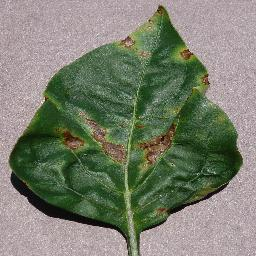

In [17]:
img

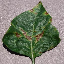

In [18]:
img=image.load_img(r'D:\Nalaiya Thiran\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\fa6dc54a-e15d-4efa-99a3-2ff41ca98a2d___JR_B.Spot 9009.JPG',target_size=(64,64))
img

In [19]:
x=image.img_to_array(img)
x

array([[[183., 168., 173.],
        [186., 171., 176.],
        [151., 136., 141.],
        ...,
        [183., 168., 173.],
        [192., 177., 182.],
        [170., 155., 160.]],

       [[162., 147., 152.],
        [165., 150., 155.],
        [182., 167., 172.],
        ...,
        [171., 156., 161.],
        [172., 157., 162.],
        [190., 175., 180.]],

       [[175., 160., 165.],
        [183., 168., 173.],
        [162., 147., 152.],
        ...,
        [175., 160., 165.],
        [166., 151., 156.],
        [181., 166., 171.]],

       ...,

       [[156., 141., 144.],
        [173., 158., 161.],
        [182., 167., 170.],
        ...,
        [201., 186., 191.],
        [208., 193., 198.],
        [171., 156., 161.]],

       [[177., 162., 165.],
        [165., 150., 153.],
        [192., 177., 180.],
        ...,
        [195., 180., 185.],
        [163., 148., 153.],
        [171., 156., 161.]],

       [[180., 165., 168.],
        [179., 164., 167.],
        [163., 1

In [20]:
x=np.expand_dims(x,axis=0)
x

array([[[[183., 168., 173.],
         [186., 171., 176.],
         [151., 136., 141.],
         ...,
         [183., 168., 173.],
         [192., 177., 182.],
         [170., 155., 160.]],

        [[162., 147., 152.],
         [165., 150., 155.],
         [182., 167., 172.],
         ...,
         [171., 156., 161.],
         [172., 157., 162.],
         [190., 175., 180.]],

        [[175., 160., 165.],
         [183., 168., 173.],
         [162., 147., 152.],
         ...,
         [175., 160., 165.],
         [166., 151., 156.],
         [181., 166., 171.]],

        ...,

        [[156., 141., 144.],
         [173., 158., 161.],
         [182., 167., 170.],
         ...,
         [201., 186., 191.],
         [208., 193., 198.],
         [171., 156., 161.]],

        [[177., 162., 165.],
         [165., 150., 153.],
         [192., 177., 180.],
         ...,
         [195., 180., 185.],
         [163., 148., 153.],
         [171., 156., 161.]],

        [[180., 165., 168.],
       

In [21]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 91ms/step


array([1], dtype=int64)

In [22]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [23]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [24]:
index[y[0]]

'Pepper,_bell___healthy'